In [52]:
import pandas as pd
import matplotlib.pyplot as plt

df_24 = pd.read_csv('SRAG_24_filtrar.csv', encoding='latin1', sep=';')
df_23 = pd.read_csv('SRAG_23_filtrar.csv', encoding='latin1', sep=';')

display(df_24)
df_24.info()

,DATA DE ENTRADA,ESTADO,CIDADE,SEXO,IDADE,FEBRE,TOSSE,GARGANTA,DESCONFORTO RESPIRATORIO,SATURACAO,ASMA,PNEUMOPATI,UTI,EVOLUCAO,ATUALIZAÇÃO DO CASO,DATA DE ENCERRAMENTO DO CASO
0,05/01/2024,CE,FORTALEZA,feminino,3,sim,sim,sim,não,não,não informado,não informado,não,cura,10/01/2024,10/01/2024
1,09/01/2024,PE,RECIFE,masculino,6,não,sim,não,não,não,não informado,não informado,não,óbito por outras causas,07/01/2024,09/01/2024
2,07/01/2024,SP,SAO PAULO,feminino,2,sim,sim,não informado,sim,sim,não informado,não informado,sim,cura,17/01/2024,31/01/2024
3,08/01/2024,BA,SANTO ANTONIO DE JESUS,masculino,37,sim,ignorado,não,sim,sim,não,não,sim,não informado,não informado,15/01/2024
4,04/01/2024,PR,IRATI,masculino,10,sim,sim,não,sim,sim,não informado,não informado,sim,cura,12/01/2024,15/01/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268627,16/08/2024,SC,ITAJAI,masculino,7,sim,sim,não informado,sim,não informado,não informado,não informado,não,cura,26/08/2024,26/08/2024
268628,18/09/2024,SC,ITAJAI,masculino,1,sim,sim,não informado,não informado,não informado,não informado,não informado,não,cura,28/09/2024,28/09/2024
268629,27/02/2025,PR,CURITIBA,masculino,82,não informado,não informado,não informado,não informado,não informado,não informado,não informado,sim,óbito por outras causas,10/04/2024,27/02/2025
268630,07/03/2025,DF,BRASILIA,feminino,80,sim,sim,não,não,sim,não,não,sim,não informado,não informado,não informado


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268632 entries, 0 to 268631
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   DATA DE ENTRADA               268632 non-null  object
 1   ESTADO                        268632 non-null  object
 2   CIDADE                        268632 non-null  object
 3   SEXO                          268632 non-null  object
 4   IDADE                         268632 non-null  int64 
 5   FEBRE                         268632 non-null  object
 6   TOSSE                         268632 non-null  object
 7   GARGANTA                      268632 non-null  object
 8   DESCONFORTO RESPIRATORIO      268632 non-null  object
 9   SATURACAO                     268632 non-null  object
 10  ASMA                          268632 non-null  object
 11  PNEUMOPATI                    268632 non-null  object
 12  UTI                           268632 non-null  object
 13 

In [70]:
# Pré-processamento para df_24_alt
df_24_alt = df_24.dropna(subset=['DATA DE ENTRADA'])
df_24_alt['DATA DE ENTRADA'] = pd.to_datetime(df_24_alt['DATA DE ENTRADA'], format='%d/%m/%Y', errors='coerce')

# Manter apenas datas até o final de 2024
df_24_alt = df_24_alt[df_24_alt['DATA DE ENTRADA'].dt.year <= 2024]

# Filtrar para o estado de São Paulo
df_24_alt = df_24_alt[df_24_alt['ESTADO'] == 'SP']

# Pré-processamento para df_23_alt
df_23_alt = df_23.dropna(subset=['DATA DE ENTRADA'])
df_23_alt['DATA DE ENTRADA'] = pd.to_datetime(df_23_alt['DATA DE ENTRADA'], format='%d/%m/%Y', errors='coerce')

# Filtrar para o estado de São Paulo
df_23_alt = df_23_alt[df_23_alt['ESTADO'] == 'SP']

# Manter apenas datas até o final de 2023
df_23_alt = df_23_alt[df_23_alt['DATA DE ENTRADA'].dt.year <= 2023]


C:\Users\46287762888\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\46287762888\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\46287762888\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\46287762888\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\46287762888\A

                               SARIMAX Results                                
Dep. Variable:                  CASOS   No. Observations:                  105
Model:                ARIMA(48, 0, 3)   Log Likelihood                -703.086
Date:                Thu, 05 Jun 2025   AIC                           1512.171
Time:                        19:52:13   BIC                           1652.831
Sample:                    01-01-2023   HQIC                          1569.169
                         - 12-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1388.2427     32.153     43.176      0.000    1325.224    1451.261
ar.L1          0.1386      0.158      0.876      0.381      -0.172       0.449
ar.L2          0.1972      0.142      1.392      0.1

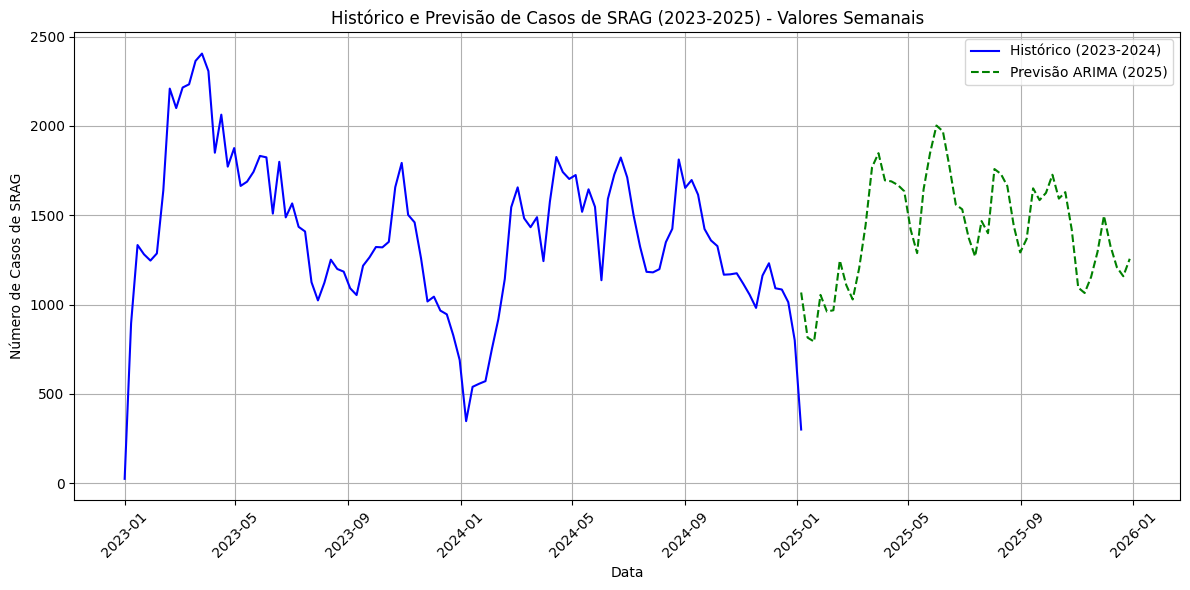

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Supondo que df_23_alt e df_24_alt sejam seus DataFrames já tratados, com cada linha representando um caso

# Concatenar os DataFrames de 2023 e 2024
df_model = pd.concat([df_23_alt[['DATA DE ENTRADA']], df_24_alt[['DATA DE ENTRADA']]])

# Convertendo 'DATA DE ENTRADA' para datetime, caso não tenha sido feito ainda
df_model['DATA DE ENTRADA'] = pd.to_datetime(df_model['DATA DE ENTRADA'], format='%d/%m/%Y')

# Agrupar os casos por semana (contar o número de casos por semana)
df_model = df_model.groupby('DATA DE ENTRADA').size()

# Resample para agregação semanal (considerando o início de cada semana)
df_model_weekly = df_model.resample('W').sum()

# Convertendo o índice para DataFrame (opcional, mas pode facilitar)
df_model_weekly = df_model_weekly.reset_index(name='CASOS')

# Configurar 'DATA DE ENTRADA' como índice
df_model_weekly.set_index('DATA DE ENTRADA', inplace=True)

# Verificando dados nulos e preenchendo com 0, caso necessário
df_model_weekly = df_model_weekly.fillna(0)

# Dividindo os dados em treino (2023-2024) e teste (2025)
train = df_model_weekly[df_model_weekly.index.year <= 2024]
test = df_model_weekly[df_model_weekly.index.year == 2025]

# Ajuste do modelo ARIMA (parâmetros p=24, d=1, q=0 como exemplo)(48, 1, 3))
model = ARIMA(train['CASOS'], order=(48, 0, 3))  # Ajuste conforme necessário
model_fit = model.fit()

# Exibindo o resumo do modelo ajustado
print(model_fit.summary())

# Realizando a previsão para 2025 (52 semanas, considerando ano completo)
steps = 52  # Número de semanas para prever
previsaoArima = model_fit.forecast(steps=steps)

# Criando um DataFrame com as previsões
future_dates = pd.date_range(start='2025-01-01', periods=steps, freq='W-SUN')  # Prevendo as semanas
df_previsoes = pd.DataFrame({
    'ds': future_dates,
    'Previsao_ARIMA': previsaoArima
})

# Exportando as previsões para um arquivo Excel
df_previsoes.to_excel("previsoes_ARIMA_2025_semanal.xlsx", index=False)
print("Arquivo Excel 'previsoes_ARIMA_2025_semanal.xlsx' gerado com sucesso.")

# Visualização da previsão
plt.figure(figsize=(12, 6))
plt.plot(df_model_weekly.index, df_model_weekly['CASOS'], label='Histórico (2023-2024)', color='blue')
plt.plot(df_previsoes['ds'], df_previsoes['Previsao_ARIMA'], label='Previsão ARIMA (2025)', linestyle='--', color='green')

plt.title('Histórico e Previsão de Casos de SRAG (2023-2025) - Valores Semanais')
plt.xlabel('Data')
plt.ylabel('Número de Casos de SRAG')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\46287762888\AppData\Local\Temp\ipykernel_12116\3209067124.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  casos_mensais_2023 = df_23_alt.groupby(pd.Grouper(key='DATA DE ENTRADA', freq='M')).size()
C:\Users\46287762888\AppData\Local\Temp\ipykernel_12116\3209067124.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  casos_mensais_2024 = df_24_alt.groupby(pd.Grouper(key='DATA DE ENTRADA', freq='M')).size()


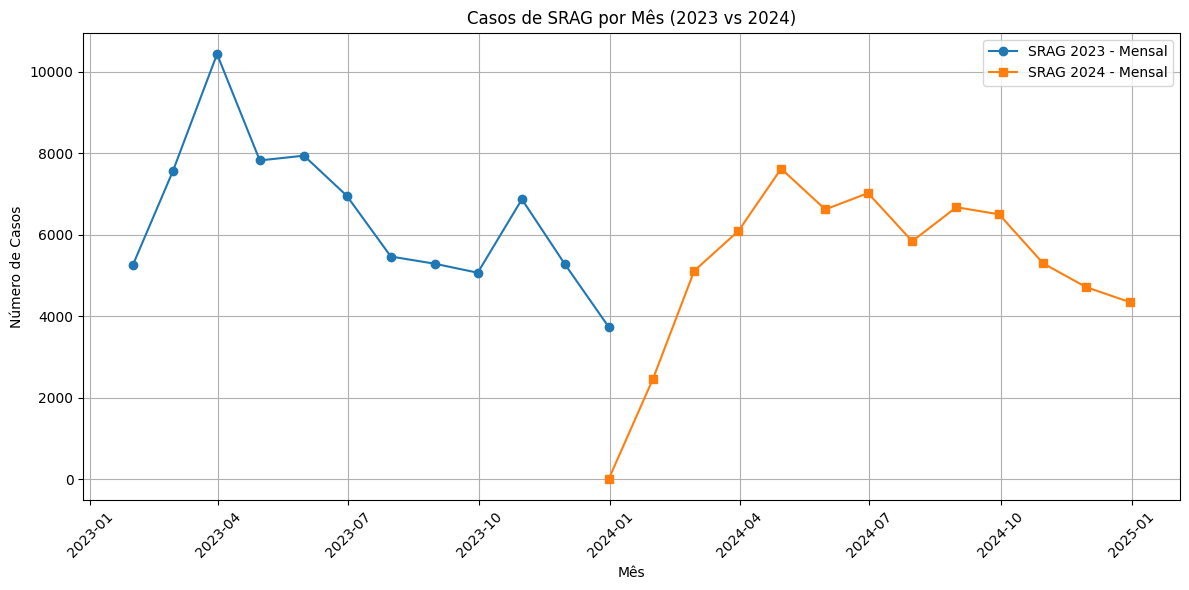

In [56]:
# Agrupar casos por mês
casos_mensais_2023 = df_23_alt.groupby(pd.Grouper(key='DATA DE ENTRADA', freq='M')).size()
casos_mensais_2024 = df_24_alt.groupby(pd.Grouper(key='DATA DE ENTRADA', freq='M')).size()

# Plotar
plt.figure(figsize=(12, 6))
plt.plot(casos_mensais_2023.index, casos_mensais_2023.values, label='SRAG 2023 - Mensal', marker='o')
plt.plot(casos_mensais_2024.index, casos_mensais_2024.values, label='SRAG 2024 - Mensal', marker='s')

plt.title('Casos de SRAG por Mês (2023 vs 2024)')
plt.xlabel('Mês')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


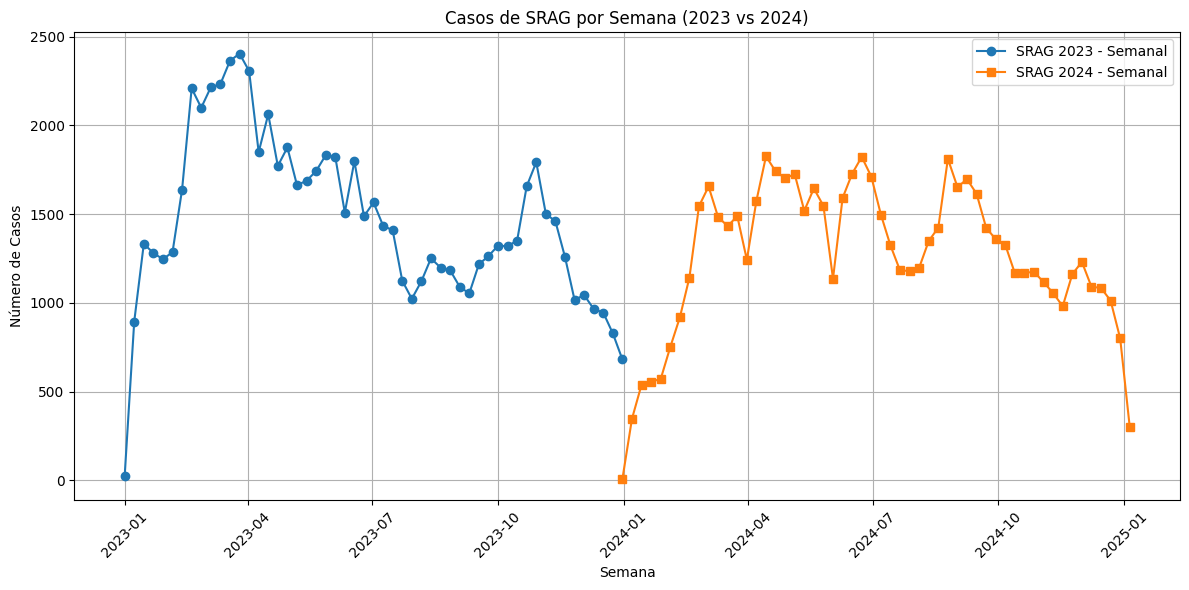

In [57]:
# Agrupar casos por semana
casos_semanais_2023 = df_23_alt.groupby(pd.Grouper(key='DATA DE ENTRADA', freq='W')).size()
casos_semanais_2024 = df_24_alt.groupby(pd.Grouper(key='DATA DE ENTRADA', freq='W')).size()

# Plotar
plt.figure(figsize=(12, 6))
plt.plot(casos_semanais_2023.index, casos_semanais_2023.values, label='SRAG 2023 - Semanal', marker='o')
plt.plot(casos_semanais_2024.index, casos_semanais_2024.values, label='SRAG 2024 - Semanal', marker='s')

plt.title('Casos de SRAG por Semana (2023 vs 2024)')
plt.xlabel('Semana')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
